In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

In [3]:
# Database credentials
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

# use the credentials to start a connection
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))


# Use the connection to extract SQL data
performance_df = pd.read_sql_query('SELECT * FROM studentsperformance', con=engine)

# Close the connection
engine.dispose()

In [4]:
#Check if any values are NaN and need to be fixed
print(performance_df.isnull().sum()/performance_df.isnull().count())


gender                         0.0
race/ethnicity                 0.0
parental level of education    0.0
lunch                          0.0
test preparation course        0.0
math score                     0.0
reading score                  0.0
writing score                  0.0
dtype: float64


### 1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?

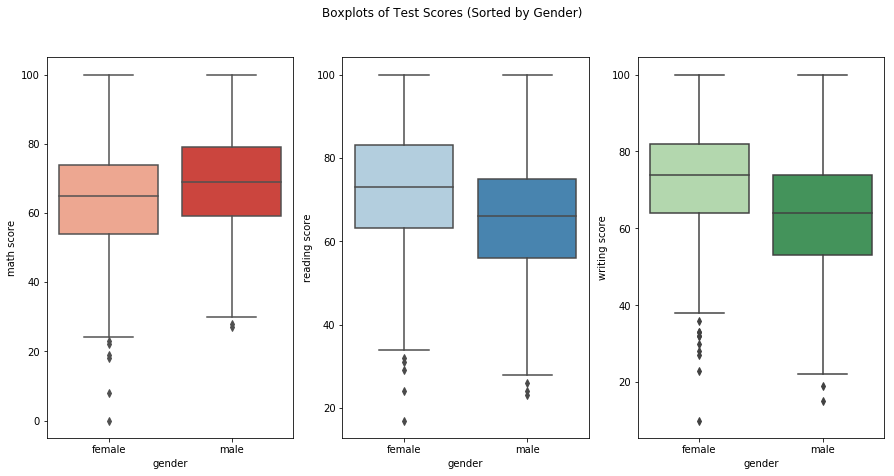

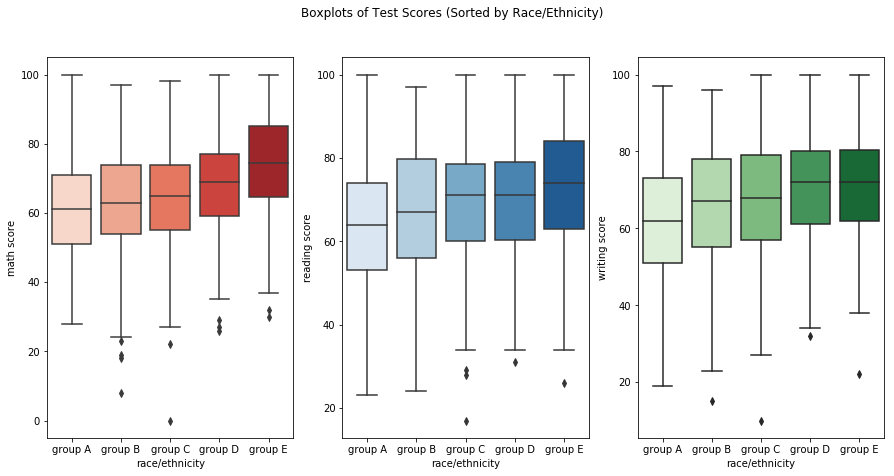

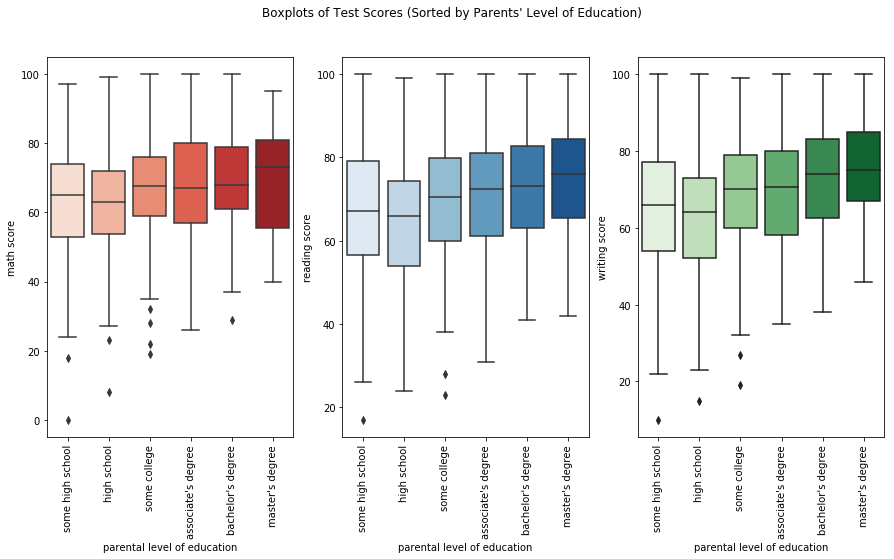

In [60]:
unique_gender = list(performance_df['gender'].unique())

unique_race = list(performance_df['race/ethnicity'].unique())
unique_race.sort()   #Alphabetize

unique_parentalEd = ["some high school", "high school", "some college", "associate's degree", "bachelor's degree", "master's degree" ]


#Gender boxplots
plt.figure(figsize=(15, 7))

plt.subplot(1,3,1)
sns.boxplot(x='gender', y='math score', data=performance_df, palette='Reds', order = unique_gender)

plt.subplot(1,3,2)
sns.boxplot(x='gender', y='reading score', data=performance_df, palette='Blues', order = unique_gender)

plt.subplot(1,3,3)
sns.boxplot(x='gender', y='writing score', data=performance_df, palette='Greens', order = unique_gender)

plt.suptitle('Boxplots of Test Scores (Sorted by Gender)')
plt.show()


#Ethnicity boxplots
plt.figure(figsize=(15, 7))

plt.subplot(1,3,1)
sns.boxplot(x='race/ethnicity', y='math score', data=performance_df, palette='Reds', order = unique_race)

plt.subplot(1,3,2)
sns.boxplot(x='race/ethnicity', y='reading score', data=performance_df, palette='Blues', order = unique_race)

plt.subplot(1,3,3)
sns.boxplot(x='race/ethnicity', y='writing score', data=performance_df, palette='Greens', order = unique_race)

plt.suptitle('Boxplots of Test Scores (Sorted by Race/Ethnicity)')
plt.show()


#Parental Education boxplots
plt.figure(figsize=(15, 7))

plt.subplot(1,3,1)
sns.boxplot(x='parental level of education', y='math score', data=performance_df, palette='Reds', order = unique_parentalEd)
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.boxplot(x='parental level of education', y='reading score', data=performance_df, palette='Blues', order = unique_parentalEd)
plt.xticks(rotation=90)

plt.subplot(1,3,3)
sns.boxplot(x='parental level of education', y='writing score', data=performance_df, palette='Greens', order = unique_parentalEd)
plt.xticks(rotation=90)

plt.suptitle("Boxplots of Test Scores (Sorted by Parents' Level of Education)")
plt.show()

Men tend to score higher than women in math, but women score higher than men in reading and writing. Each ethnic group scored higher than the previous ones in all subjects as you proceed from Group A to Group E. Higher parental education levels tend to correlate to higher test scores in all subjects. One notable difference is that parents with 'some high school' had children with higher scores than parents with 'high school,' implying that students whose parents dropped out of high school score better than those whose parents graduated high school but didn't go on to college.

### 2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?

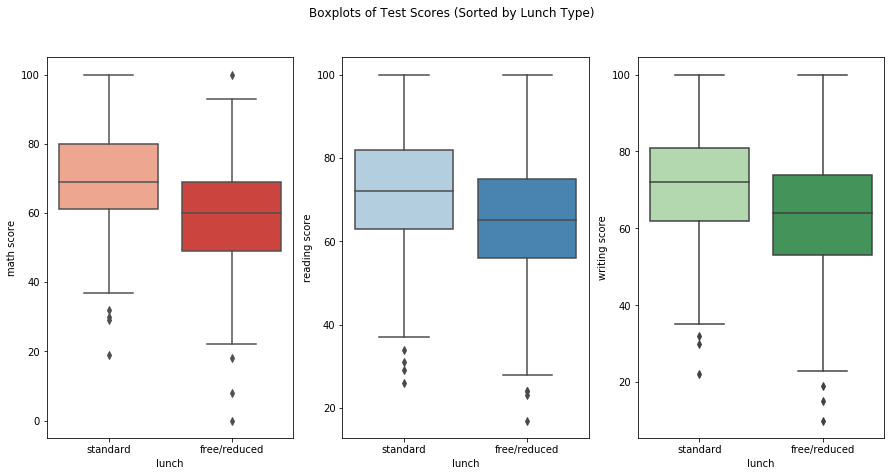

In [62]:
unique_lunch = list(performance_df['lunch'].unique())

#Lunch boxplots
plt.figure(figsize=(15, 7))

plt.subplot(1,3,1)
sns.boxplot(x='lunch', y='math score', data=performance_df, palette='Reds', order = unique_lunch)

plt.subplot(1,3,2)
sns.boxplot(x='lunch', y='reading score', data=performance_df, palette='Blues', order = unique_lunch)

plt.subplot(1,3,3)
sns.boxplot(x='lunch', y='writing score', data=performance_df, palette='Greens', order = unique_lunch)

plt.suptitle('Boxplots of Test Scores (Sorted by Lunch Type)')
plt.show()

Students who qualify for free or reduced lunch have to come from a low-income household. Because those students come from families with less money, they have less ability to hire tutors or pay for test preparation courses, so it makes sense that they would have lower test scores.

### 3. Does the test preparation course seem to have an effect on the exam performances?

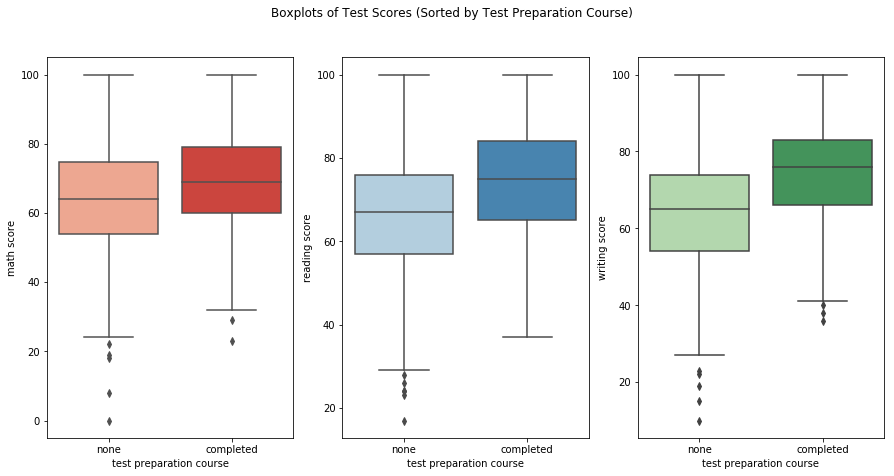

In [65]:
unique_testprep = list(performance_df['test preparation course'].unique())

#Test Prep boxplots
plt.figure(figsize=(15, 7))

plt.subplot(1,3,1)
sns.boxplot(x='test preparation course', y='math score', data=performance_df, palette='Reds', order = unique_testprep)

plt.subplot(1,3,2)
sns.boxplot(x='test preparation course', y='reading score', data=performance_df, palette='Blues', order = unique_testprep)

plt.subplot(1,3,3)
sns.boxplot(x='test preparation course', y='writing score', data=performance_df, palette='Greens', order = unique_testprep)

plt.suptitle('Boxplots of Test Scores (Sorted by Test Preparation Course)')
plt.show()

### 4. Which 2 exam scores are most correlated with each other?

In [66]:
performance_df.corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


Here we see that reading and writing scores are much more highly correlated to each other than to math, which makes sense, because both reading and writing require similar knowledge and understanding of the English language, while math does not.